# DL_tutorial2_DEMO

### resources
sendex youtube deep learning tutorail

https://www.youtube.com/watch?v=wQ8BIBpya2k&list=PLQVvvaa0QuDfhTox0AjmQ6tvTgMBZBEXN

### MEMO

this code could not run at Colab since it uses huge training datasets. 

### importing libralies

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2  # pip install opencv-python

In [ ]:
# getting cwd to import dataset
import os
cwd = os.getcwd()
files = os.listdir(cwd)
print(cwd, files)

### creating training dataset

In [ ]:
##### params IMG_SIZE
training_data = []
IMG_SIZE = 70
DATADIR = 'PetImages'
CATEGORIES = ['Dog', 'Cat'] # dog index is 0, cat is 1

# creating training dataset and resizing every imgs
from tqdm import tqdm
def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category) # path to cat or dog dir
        labels = CATEGORIES.index(category) # labels
        for img in os.listdir(path): # os.listdir(path) returns path to cat or dog dir
            try:
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                resized_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([resized_array, labels])
            except Exception as e:
                pass
        
create_training_data() 

import random
random.shuffle(training_data)
print('len of training data is', len(training_data))

# dividing into feature X and labels y
X = []
y = []

for features, label in training_data:
    X.append(features)
    y.append(label)    
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
X = X/255.0

# checking data
plt.imshow(training_data[1000][0], cmap = 'gray')
print(X[1][1][1])
print(X.shape)
print('sample img')

### saving / loading data (optional)

In [ ]:
# saving data
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [ ]:
# loading saved data
import pickle
pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

### building the model and training

In [ ]:
# building conv model

# Adding time to name progress with time
import time

# Adding tensorboard for callback
from tensorflow.keras.callbacks import TensorBoard

# naming model with time

##### params
NAME = 'DvsC'.format(int(time.time()))
tensorboard = TensorBoard(log_dir='logs/{}'.format(NAME))

import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

# building model
model = Sequential()

# the first layer
# input_shape will be (IMG_SIZExIMG_SIZEx1)
model.add(Conv2D(64, (3, 3), input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# second layer
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Conv layer is 2D, Dense layer is 1D.
# so we need to flatten our data into 1D before using Dense layer
model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(64))

# last layer (out put layer)
# because we want to classify dog or cat, we only need 1 node for last layer
# (out put will be the probabirity (because of sigmoid) of the img being cat or dog)
model.add(Dense(1))
model.add(Activation('sigmoid'))


# compiling
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

##### params: epochs
### don't forget to add callback for tensorboard
# fitting / training
model.fit(X, y, batch_size=32, epochs=10, validation_split=0.3, callbacks=[tensorboard])

# saving the (trained) model 
model_name = 'CvsD.model'
model.save(model_name)

### 3 dense model

In [ ]:
X.shape

In [ ]:
X = np.squeeze(X)

In [ ]:
X.shape

In [ ]:
y = np.asarray(y, dtype='float64')

In [ ]:
# building conv model

# Adding time to name progress with time
import time

# Adding tensorboard for callback
from tensorflow.keras.callbacks import TensorBoard

# naming model with time

##### params
NAME = '0-conv-128-nodes-3-dense-{}'.format(int(time.time()))
tensorboard = TensorBoard(log_dir='logs/{}'.format(NAME))

import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

# building model
model = Sequential()

# Conv layer is 2D, Dense layer is 1D.
# so we need to flatten our data into 1D before using Dense layer
model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(128))

model.add(Dense(128))

model.add(Dense(128))

# last layer (out put layer)
# because we want to classify dog or cat, we only need 1 node for last layer
# (out put will be the probabirity (because of sigmoid) of the img being cat or dog)
model.add(Dense(1))
model.add(Activation('sigmoid'))


# compiling
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

##### params: epochs
### don't forget to add callback for tensorboard
# fitting / training
model.fit(X, y, batch_size=32, epochs=10, validation_split=0.3, callbacks=[tensorboard])

# saving the (trained) model 
model_name = '{}'.format(NAME)
model.save(model_name)

## original conv model

### library

In [ ]:
import time
from tensorflow.keras.callbacks import TensorBoard
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

### NAME

In [ ]:
##### params
NAME = 'Dog-vs-Cat-conv-{}'.format(int(time.time()))
tensorboard = TensorBoard(log_dir='logs/{}'.format(NAME))

### convolution model

In [ ]:
# building model
model = Sequential()

# first layer
model.add(Conv2D(128, (3, 3), input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# second layer
model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# third layer
model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# last layer
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(1, activation=tf.nn.softmax))


In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
model.fit(X, y, batch_size=32, epochs=10, validation_split=0.3, callbacks=[tensorboard])

In [ ]:
# saving the (trained) model 
model_name = '{}'.format(NAME)
model.save(model_name)

### open tensorboard

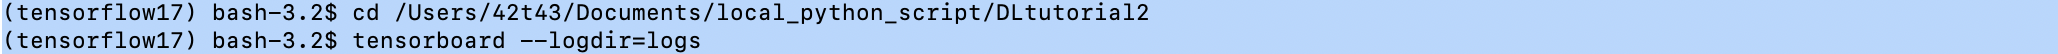

### try this code if you have tensorboard error

tensorboard --logdir=logs/ --host localhost --port 8088

### Part 5: experimenting params

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
# more info on callbakcs: https://keras.io/callbacks/ model saver is cool too.
from tensorflow.keras.callbacks import TensorBoard
import pickle
import time

pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

dense_layers = [0, 1, 2]
layer_sizes = [32, 64, 128]
conv_layers = [1, 2, 3]

for dense_layer in dense_layers:
    for layer_size in layer_sizes:
        for conv_layer in conv_layers:
            NAME = "{}-conv-{}-nodes-{}-dense-{}".format(conv_layer, layer_size, dense_layer, int(time.time()))
            print(NAME)

            model = Sequential()

            model.add(Conv2D(layer_size, (3, 3), input_shape=X.shape[1:]))
            model.add(Activation('relu'))
            model.add(MaxPooling2D(pool_size=(2, 2)))

            for l in range(conv_layer-1):
                model.add(Conv2D(layer_size, (3, 3)))
                model.add(Activation('relu'))
                model.add(MaxPooling2D(pool_size=(2, 2)))

            model.add(Flatten())

            for _ in range(dense_layer):
                model.add(Dense(layer_size))
                model.add(Activation('relu'))

            model.add(Dense(1))
            model.add(Activation('sigmoid'))

            tensorboard = TensorBoard(log_dir="logs/{}".format(NAME))

            model.compile(loss='binary_crossentropy',
                          optimizer='adam',
                          metrics=['accuracy'],
                          )

            model.fit(X, y,
                      batch_size=32,
                      epochs=10,
                      validation_split=0.3,
                      callbacks=[tensorboard])
            
            # saving the (trained) model 
            model_name = '{}.model'.format(NAME)
            model.save(model_name)
            

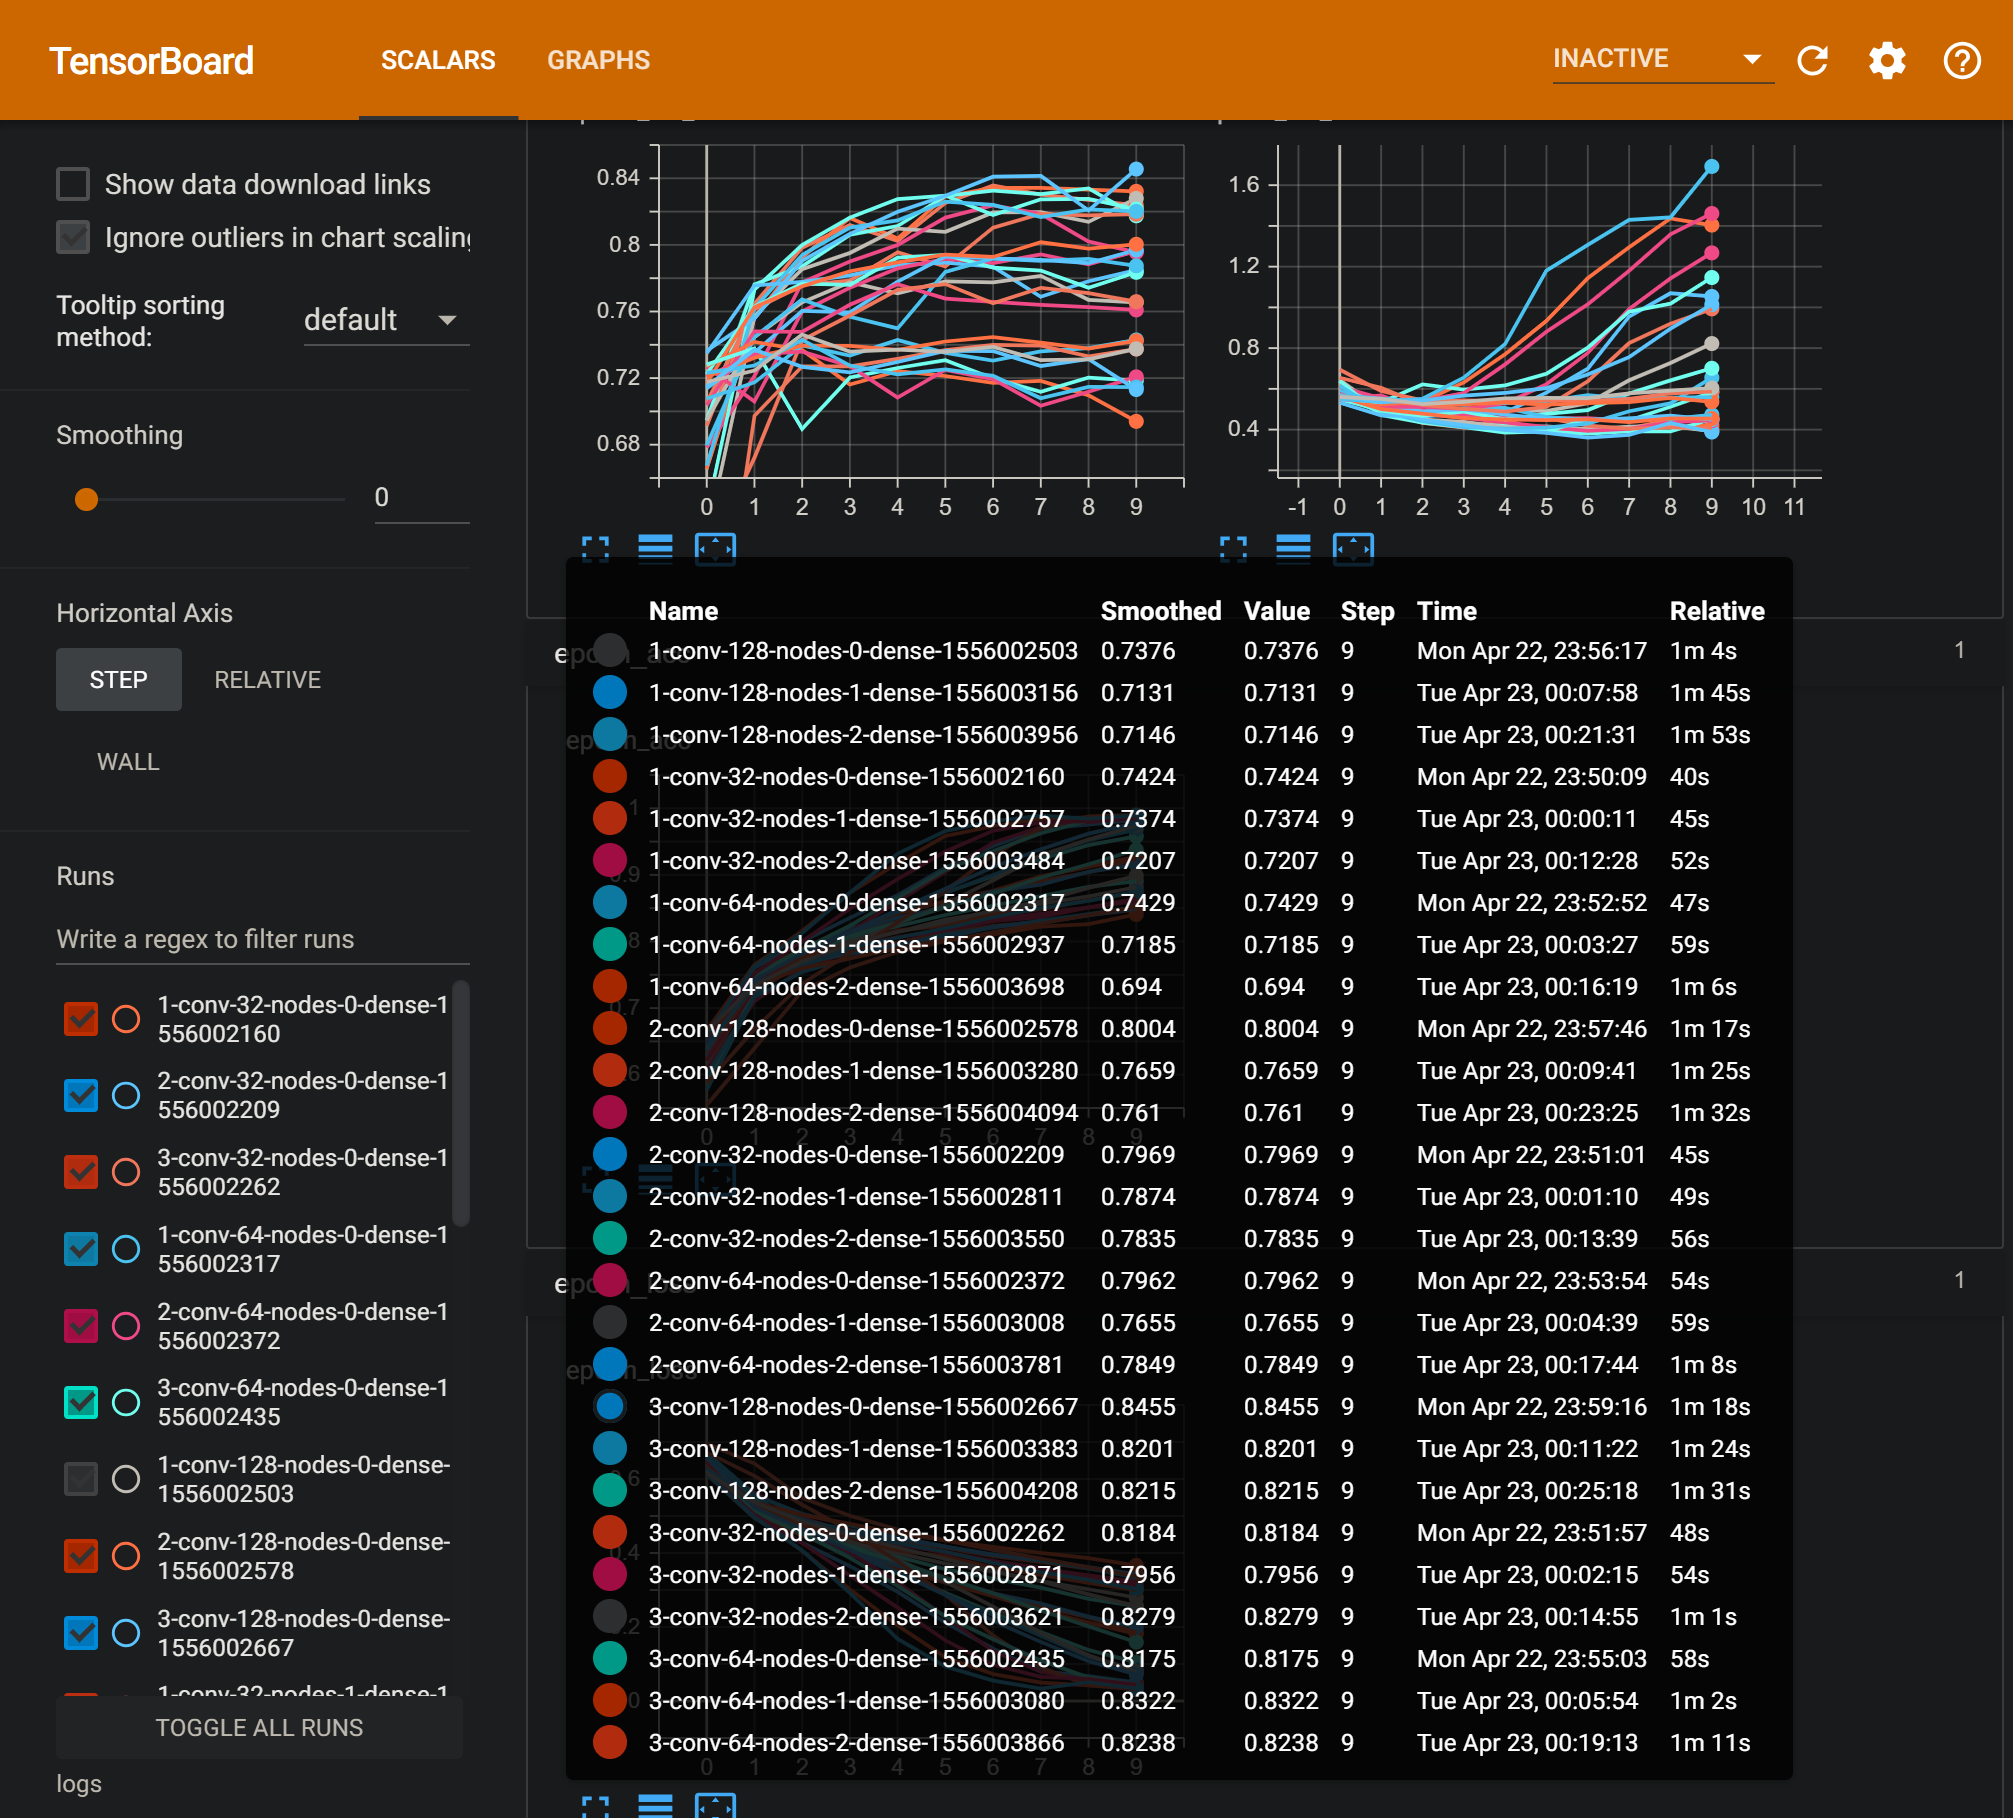

from tensorboard, 3-conv-128-nodes-0-dense model had highest validation accuracy

let's predict test images with the model

### Part6 : Prediction

In [2]:
import cv2
import tensorflow as tf
import os
import matplotlib.pyplot as plt

CATEGORIES = ['Dog', 'Cat'] 

### defining function to pre-processe images into 70x70pixel

In [3]:
def prepare(filepath):
    ##### IMG_SIZE
    IMG_SIZE = 70
    img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1)

### loading trained model

In [4]:
##### model name
model = tf.keras.models.load_model('models/3-conv-128-nodes-0-dense-1556002667')

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


### making predictions

In [5]:
##### resize images
def prepare(filepath):
    ##### IMG_SIZE
    IMG_SIZE = 70
    img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1)

### prediction with training images

--------------------------------
prediction_No.0
Cat
(original image)


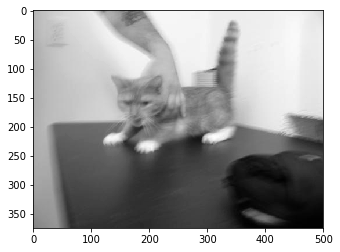

(resized image)


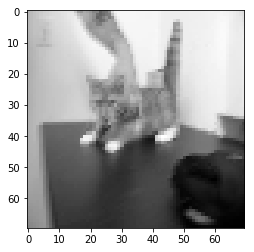

--------------------------------
prediction_No.1
Cat
(original image)


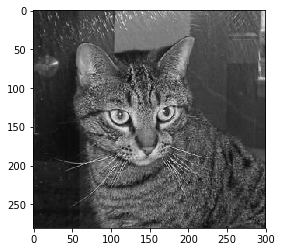

(resized image)


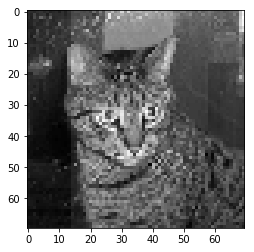

--------------------------------
prediction_No.2
Cat
(original image)


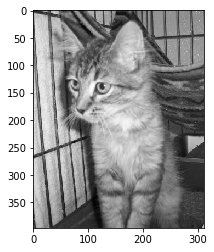

(resized image)


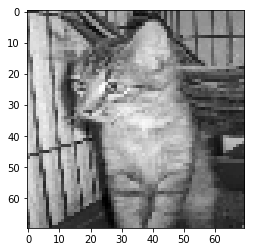

--------------------------------
prediction_No.3
Cat
(original image)


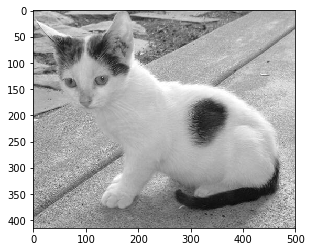

(resized image)


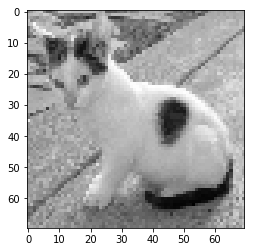

--------------------------------
prediction_No.4
Cat
(original image)


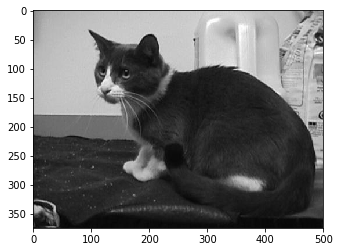

(resized image)


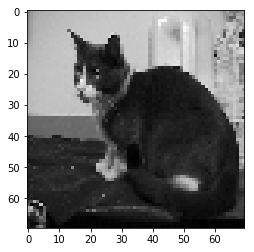

--------------------------------
prediction_No.5
Cat
(original image)


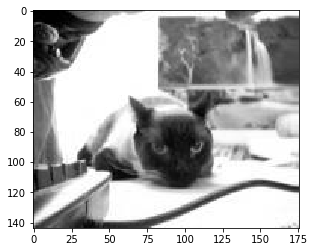

(resized image)


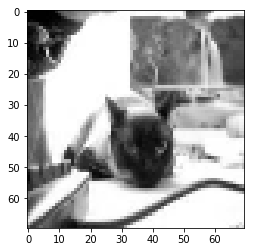

--------------------------------
prediction_No.6
Dog
(original image)


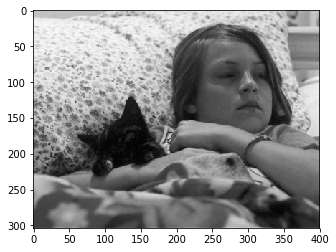

(resized image)


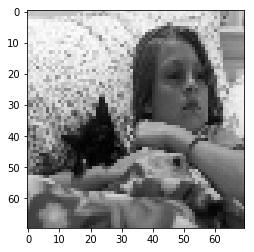

--------------------------------
prediction_No.7
Cat
(original image)


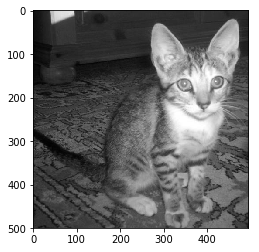

(resized image)


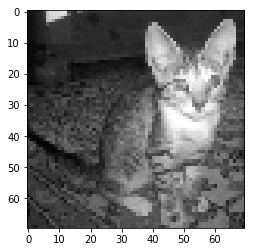

--------------------------------
prediction_No.8
Cat
(original image)


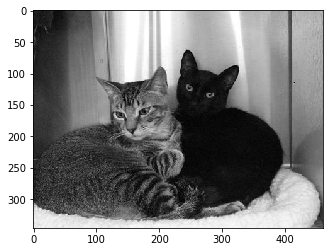

(resized image)


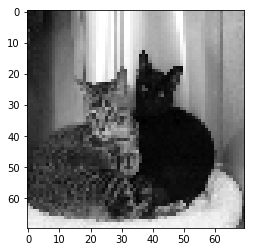

--------------------------------
prediction_No.9
Cat
(original image)


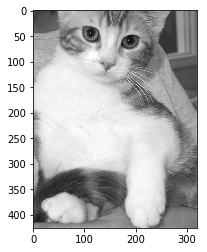

(resized image)


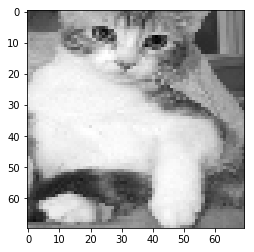

In [6]:
##### directory name, image name
PATH_TO_TEST_IMAGES_DIR = 'PetImages/Cat'
TEST_IMAGE_PATHS = [ os.path.join(PATH_TO_TEST_IMAGES_DIR,
                                  '{}.jpg'.format(i)) for i in range(0, 10) ]

for image_path in TEST_IMAGE_PATHS:
    # printing prediction No.
    print('--------------------------------')
    index = TEST_IMAGE_PATHS.index(image_path)
    print('prediction_No.{}'.format(index))
    
    # making prediction
    prediction = model.predict([prepare(image_path)])
    print(CATEGORIES[int(prediction[0][0])])
    
    # visualizing images
    ##### IMG_SIZE
    IMG_SIZE = 70
    img_array = cv2.imread((image_path), cv2.IMREAD_GRAYSCALE)
    plt.imshow(img_array, cmap='gray')
    print('(original image)')
    plt.show()

    print('(resized image)')
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    plt.imshow(new_array, cmap='gray')
    plt.show()

--------------------------------
prediction_No.0
Dog
(original image)


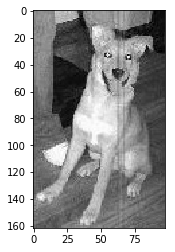

(resized image)


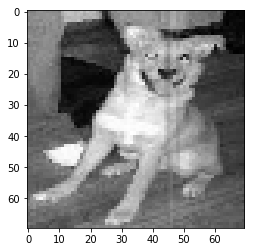

--------------------------------
prediction_No.1
Dog
(original image)


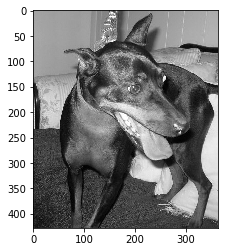

(resized image)


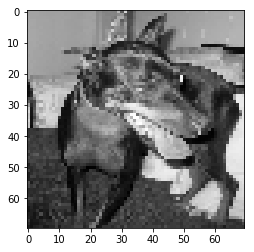

--------------------------------
prediction_No.2
Dog
(original image)


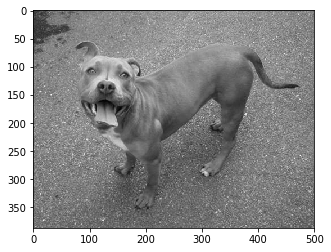

(resized image)


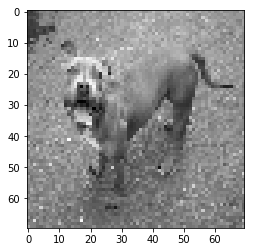

--------------------------------
prediction_No.3
Dog
(original image)


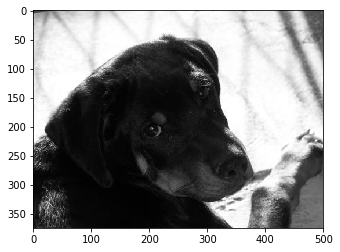

(resized image)


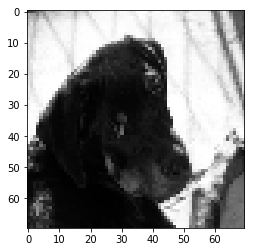

--------------------------------
prediction_No.4
Dog
(original image)


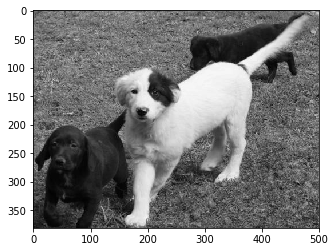

(resized image)


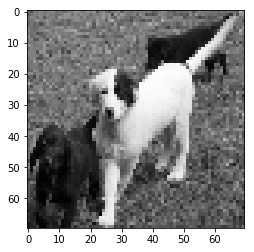

--------------------------------
prediction_No.5
Dog
(original image)


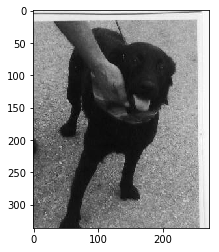

(resized image)


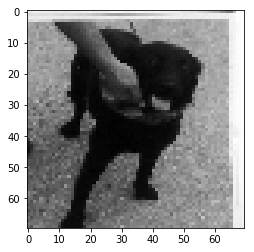

--------------------------------
prediction_No.6
Dog
(original image)


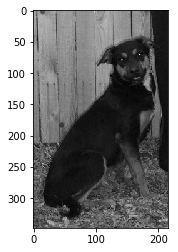

(resized image)


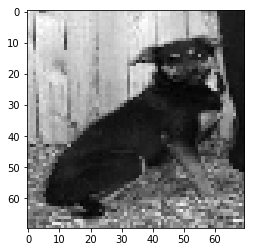

--------------------------------
prediction_No.7
Dog
(original image)


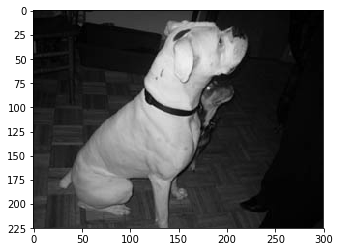

(resized image)


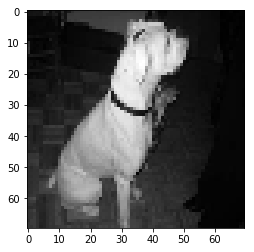

--------------------------------
prediction_No.8
Dog
(original image)


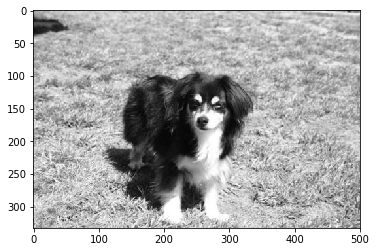

(resized image)


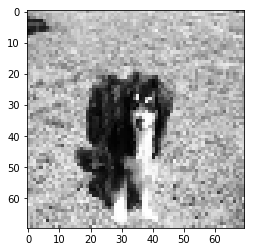

--------------------------------
prediction_No.9
Dog
(original image)


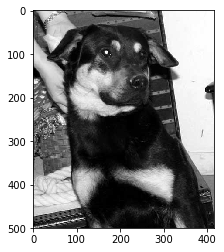

(resized image)


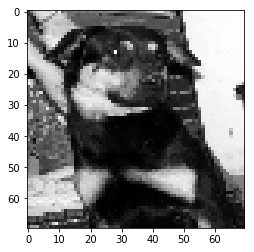

--------------------------------
prediction_No.10
Dog
(original image)


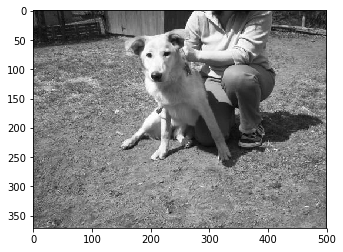

(resized image)


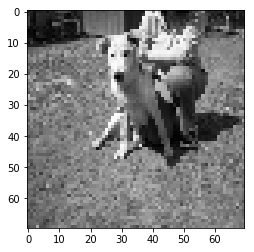

--------------------------------
prediction_No.11
Cat
(original image)


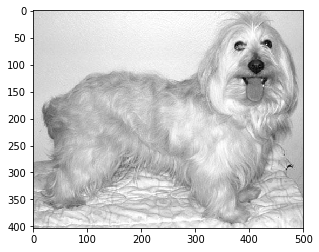

(resized image)


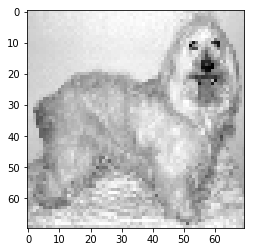

--------------------------------
prediction_No.12
Dog
(original image)


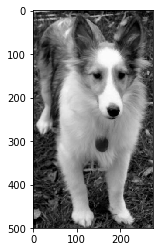

(resized image)


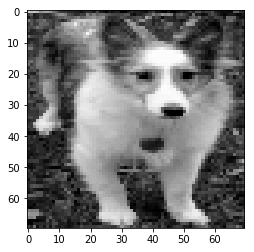

--------------------------------
prediction_No.13
Dog
(original image)


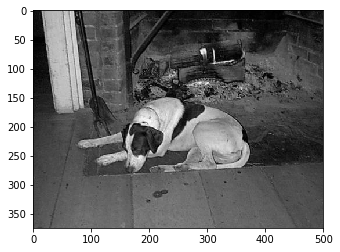

(resized image)


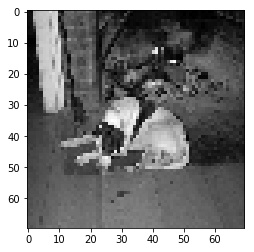

--------------------------------
prediction_No.14
Dog
(original image)


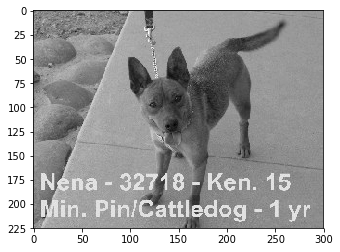

(resized image)


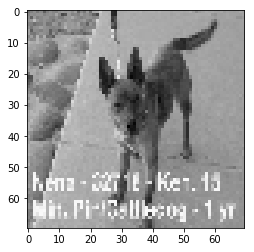

--------------------------------
prediction_No.15
Dog
(original image)


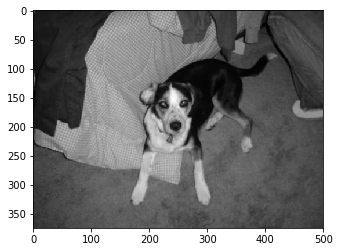

(resized image)


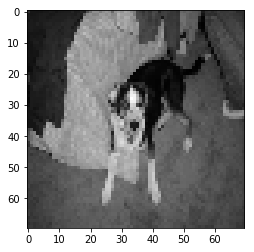

--------------------------------
prediction_No.16
Cat
(original image)


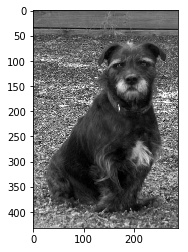

(resized image)


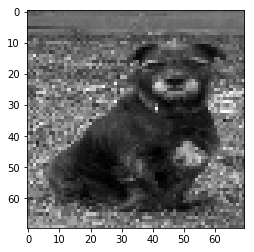

--------------------------------
prediction_No.17
Dog
(original image)


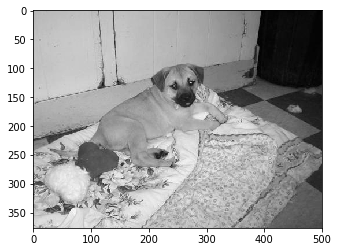

(resized image)


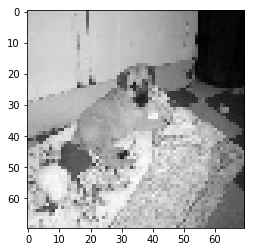

--------------------------------
prediction_No.18
Dog
(original image)


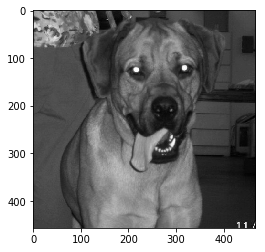

(resized image)


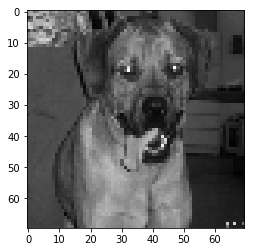

--------------------------------
prediction_No.19
Dog
(original image)


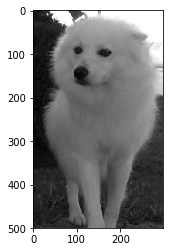

(resized image)


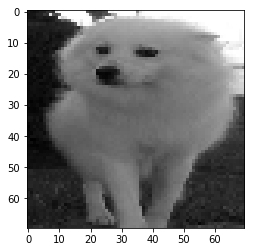

--------------------------------
prediction_No.20
Dog
(original image)


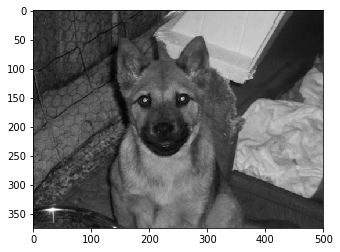

(resized image)


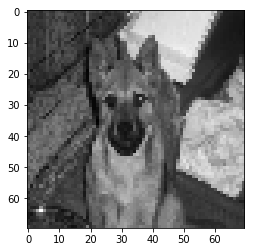

--------------------------------
prediction_No.21
Dog
(original image)


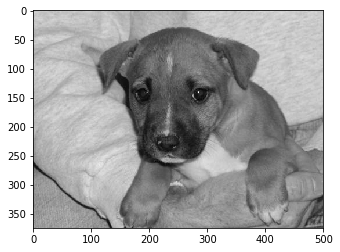

(resized image)


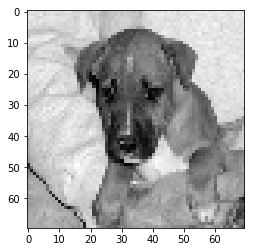

--------------------------------
prediction_No.22
Cat
(original image)


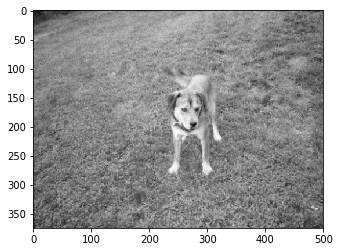

(resized image)


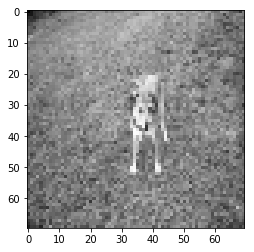

--------------------------------
prediction_No.23
Cat
(original image)


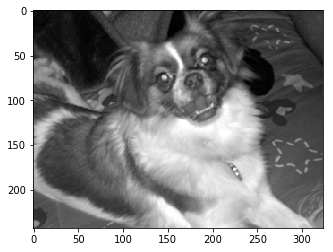

(resized image)


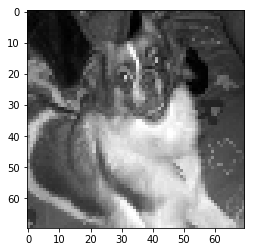

--------------------------------
prediction_No.24
Dog
(original image)


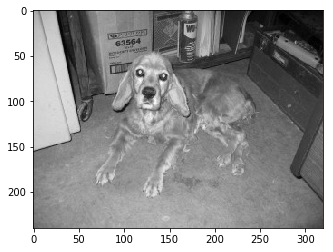

(resized image)


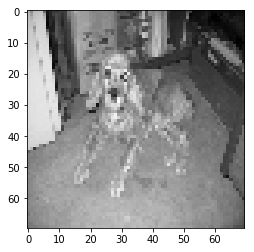

--------------------------------
prediction_No.25
Dog
(original image)


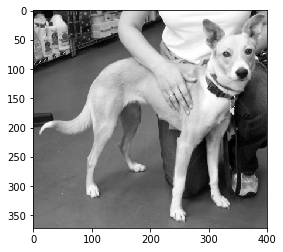

(resized image)


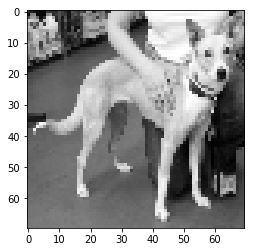

--------------------------------
prediction_No.26
Dog
(original image)


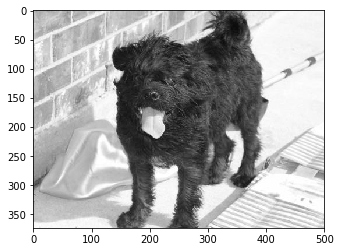

(resized image)


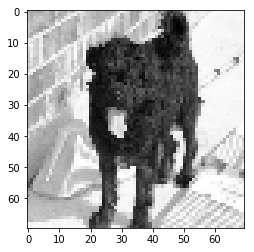

--------------------------------
prediction_No.27
Dog
(original image)


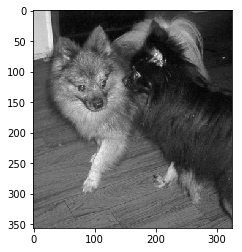

(resized image)


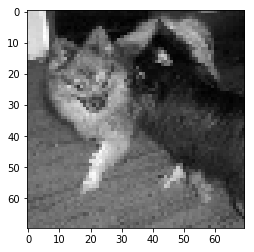

--------------------------------
prediction_No.28
Dog
(original image)


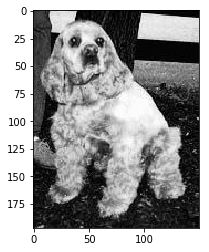

(resized image)


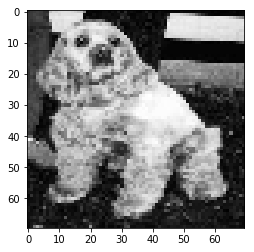

In [8]:
##### directory name, image name
PATH_TO_TEST_IMAGES_DIR = 'PetImages/Dog'
TEST_IMAGE_PATHS = [ os.path.join(PATH_TO_TEST_IMAGES_DIR,
                                  '{}.jpg'.format(i)) for i in range(12, 41) ]

for image_path in TEST_IMAGE_PATHS:
    # printing prediction No.
    print('--------------------------------')
    index = TEST_IMAGE_PATHS.index(image_path)
    print('prediction_No.{}'.format(index))
    
    # making prediction
    prediction = model.predict([prepare(image_path)])
    print(CATEGORIES[int(prediction[0][0])])
    
    # visualizing images
    ##### IMG_SIZE
    IMG_SIZE = 70
    img_array = cv2.imread((image_path), cv2.IMREAD_GRAYSCALE)
    plt.imshow(img_array, cmap='gray')
    print('(original image)')
    plt.show()

    print('(resized image)')
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    plt.imshow(new_array, cmap='gray')
    plt.show()

### prediction with test images

--------------------------------
prediction_No.0
Dog
(original image)


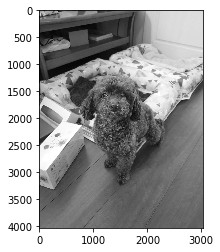

(resized image)


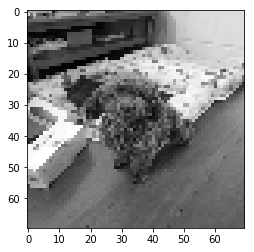

--------------------------------
prediction_No.1
Dog
(original image)


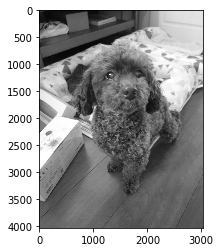

(resized image)


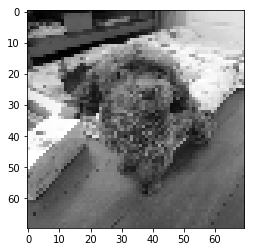

--------------------------------
prediction_No.2
Dog
(original image)


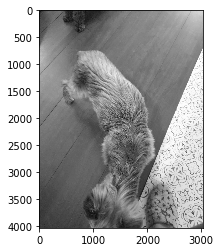

(resized image)


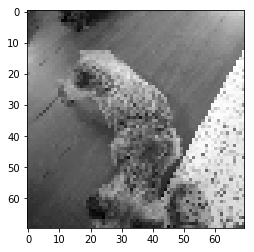

--------------------------------
prediction_No.3
Cat
(original image)


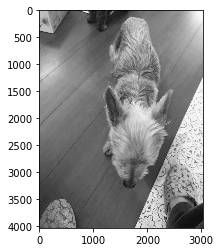

(resized image)


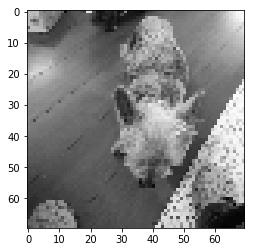

--------------------------------
prediction_No.4
Dog
(original image)


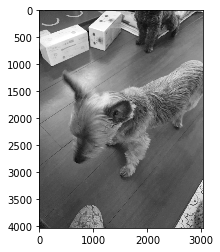

(resized image)


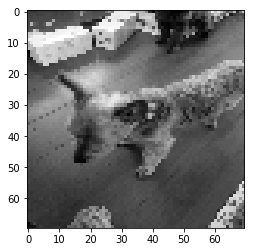

--------------------------------
prediction_No.5
Dog
(original image)


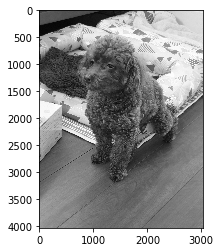

(resized image)


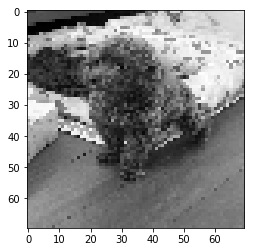

--------------------------------
prediction_No.6
Dog
(original image)


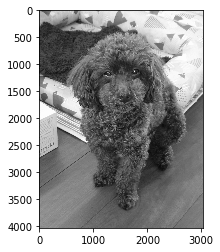

(resized image)


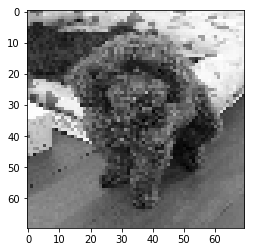

--------------------------------
prediction_No.7
Cat
(original image)


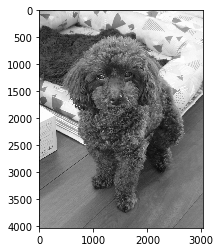

(resized image)


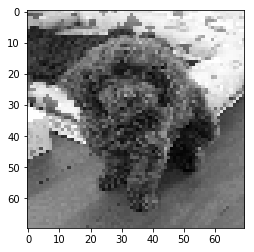

--------------------------------
prediction_No.8
Dog
(original image)


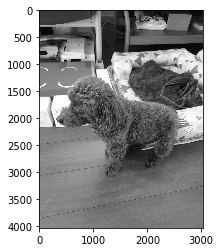

(resized image)


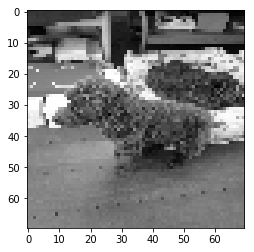

--------------------------------
prediction_No.9
Dog
(original image)


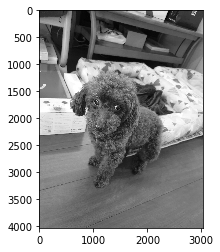

(resized image)


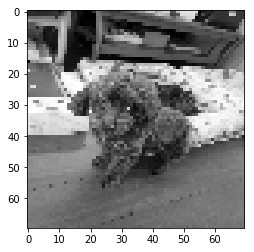

--------------------------------
prediction_No.10
Cat
(original image)


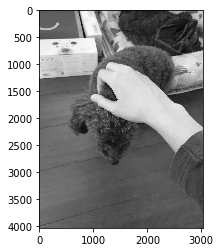

(resized image)


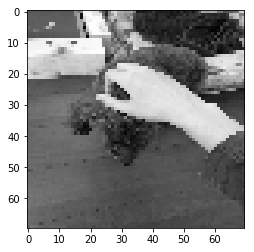

--------------------------------
prediction_No.11
Dog
(original image)


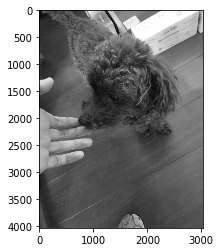

(resized image)


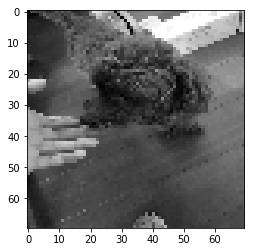

--------------------------------
prediction_No.12
Dog
(original image)


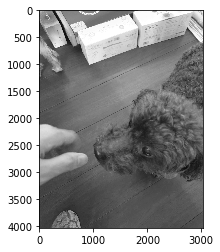

(resized image)


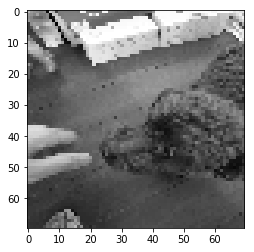

--------------------------------
prediction_No.13
Dog
(original image)


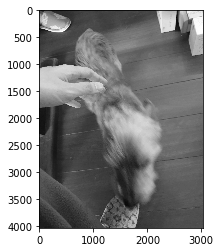

(resized image)


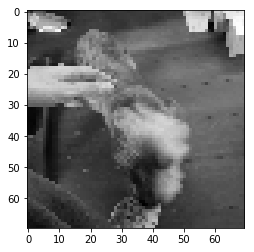

--------------------------------
prediction_No.14
Dog
(original image)


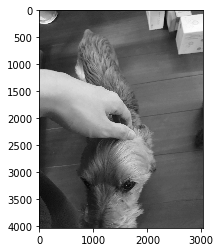

(resized image)


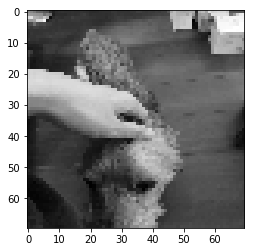

--------------------------------
prediction_No.15
Cat
(original image)


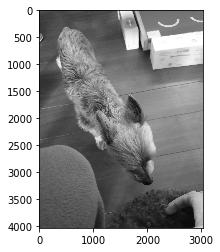

(resized image)


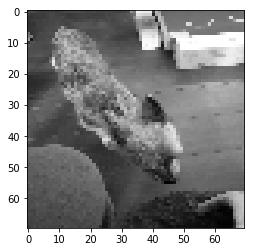

--------------------------------
prediction_No.16
Cat
(original image)


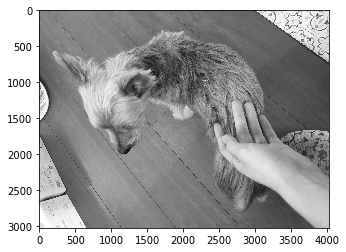

(resized image)


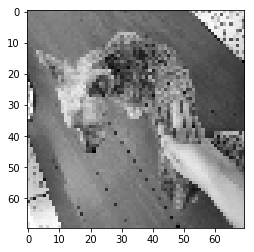

--------------------------------
prediction_No.17
Dog
(original image)


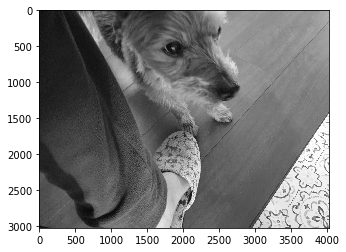

(resized image)


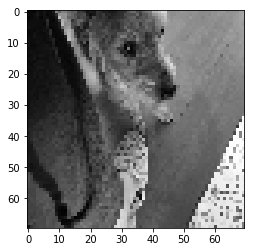

--------------------------------
prediction_No.18
Dog
(original image)


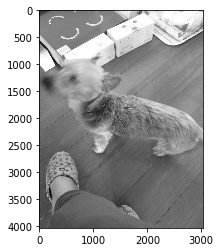

(resized image)


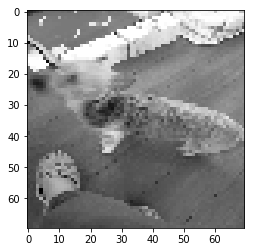

--------------------------------
prediction_No.19
Dog
(original image)


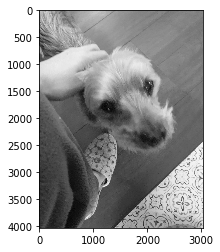

(resized image)


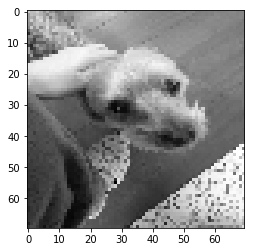

--------------------------------
prediction_No.20
Dog
(original image)


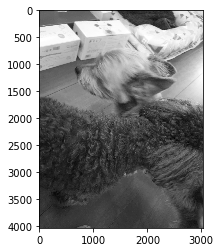

(resized image)


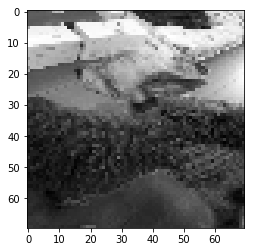

--------------------------------
prediction_No.21
Dog
(original image)


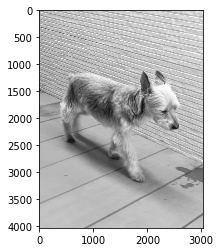

(resized image)


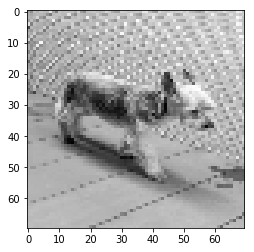

--------------------------------
prediction_No.22
Cat
(original image)


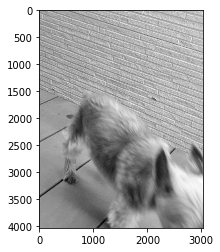

(resized image)


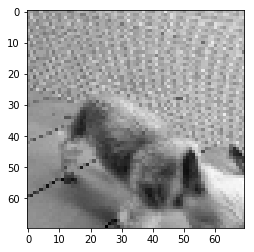

--------------------------------
prediction_No.23
Dog
(original image)


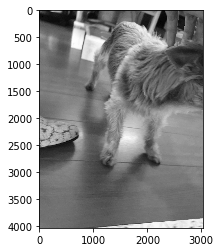

(resized image)


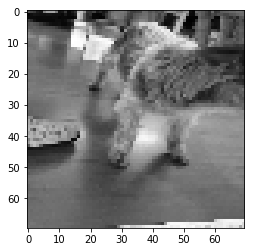

--------------------------------
prediction_No.24
Cat
(original image)


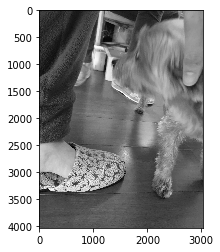

(resized image)


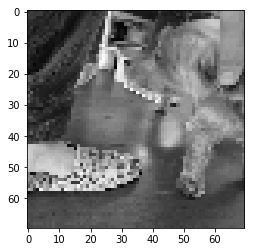

--------------------------------
prediction_No.25
Dog
(original image)


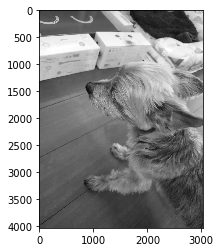

(resized image)


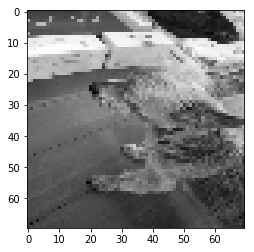

--------------------------------
prediction_No.26
Cat
(original image)


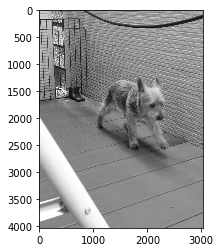

(resized image)


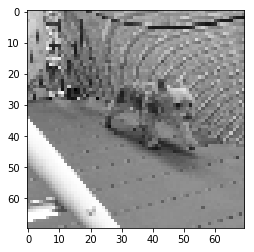

--------------------------------
prediction_No.27
Cat
(original image)


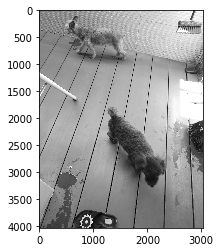

(resized image)


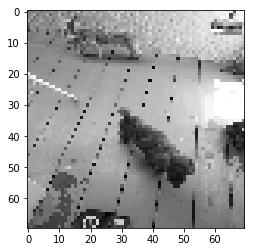

--------------------------------
prediction_No.28
Dog
(original image)


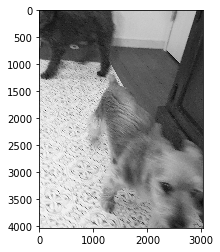

(resized image)


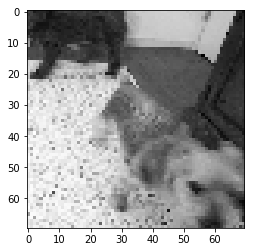

In [9]:
##### directory name, image name
PATH_TO_TEST_IMAGES_DIR = 'test_images'
TEST_IMAGE_PATHS = [ os.path.join(PATH_TO_TEST_IMAGES_DIR,
                                  '{}.jpg'.format(i)) for i in range(12, 41) ]

for image_path in TEST_IMAGE_PATHS:
    # printing prediction No.
    print('--------------------------------')
    index = TEST_IMAGE_PATHS.index(image_path)
    print('prediction_No.{}'.format(index))
    
    # making prediction
    prediction = model.predict([prepare(image_path)])
    print(CATEGORIES[int(prediction[0][0])])
    
    # visualizing images
    ##### IMG_SIZE
    IMG_SIZE = 70
    img_array = cv2.imread((image_path), cv2.IMREAD_GRAYSCALE)
    plt.imshow(img_array, cmap='gray')
    print('(original image)')
    plt.show()

    print('(resized image)')
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    plt.imshow(new_array, cmap='gray')
    plt.show()